# LAB 2 - Linear Regression

In [2]:
# Import of used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Import of the dataset
df = pd.read_excel("lab3_data.xlsx")

In [4]:
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 1 - Prediction of MEDV using RM

In [15]:
# (a) - Split data into features (RM) and target (MEDV)
X = df[['RM']]  # Predictor
y = df['MEDV']  # Response

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           2.49e-74
Time:                        12:34:41   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

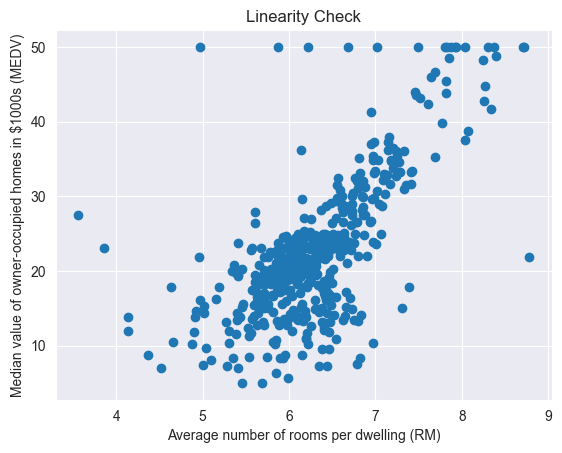

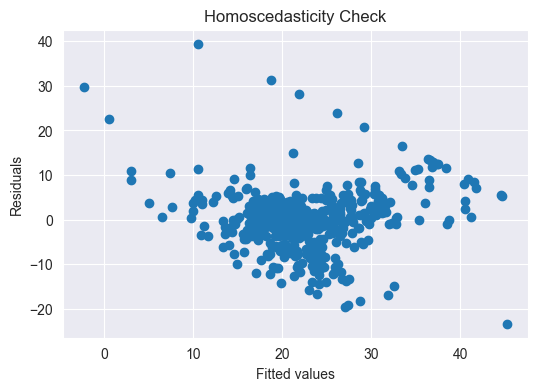

Breusch-Pagan test p-value: 0.9333833565379862


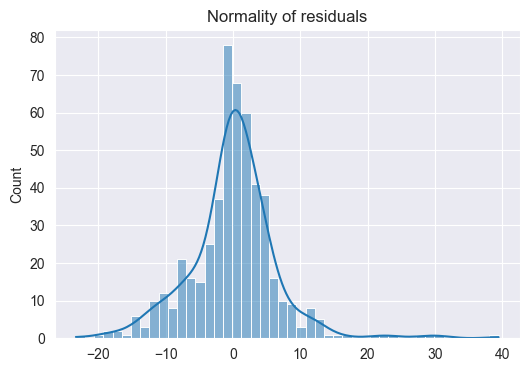

Shapiro-Wilk test p-value: 1.0877415191901464e-15


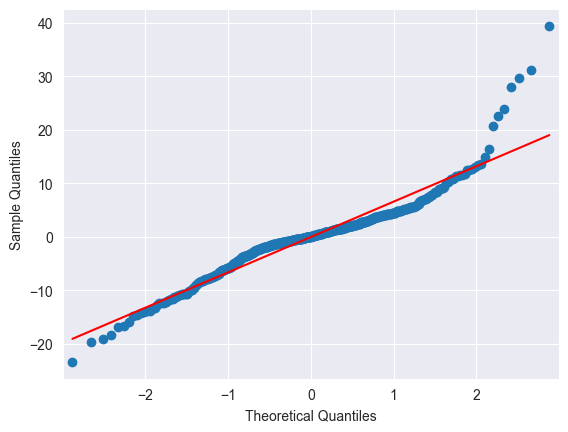

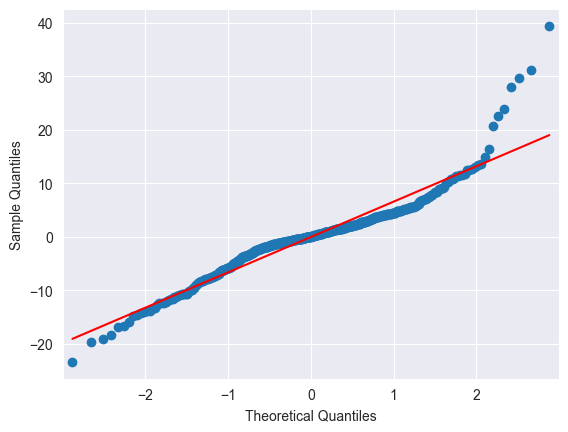

In [20]:
# Assumption checks

## Linearity
plt.scatter(df['RM'], y)
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
plt.title('Linearity Check')
plt.show()

## Homoscedasticity
pred_vals = model.fittedvalues
residuals = model.resid
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(pred_vals, residuals)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Homoscedasticity Check')
plt.show()

# Breusch-Pagan test for homoscedasticity
_, pval, _, _ = het_breuschpagan(residuals, model.model.exog)
print(f"Breusch-Pagan test p-value: {pval}")

# Normality of the residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Normality of residuals')
plt.show()

# Shapiro-Wilk test for normality
stat, p = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value:', p)

# Q-Q Plot for residuals
sm.qqplot(model.resid, line="s")

 This value indicates how much the median value of owner-occupied homes (MEDV) is expected to increase for each additional room. A positive coefficient suggests a positive relationship between the number of rooms and house prices.
 
The coefficent value is $MEDV_{coeff} = 9.1021$



## 2 - Multiple Linear Regression model to predict MEDV


In [43]:
# Multiple Linear regression model
X = df.drop('MEDV', axis=1)  # All other variables as predictors
y = df['MEDV']  # Response
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     100.6
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          3.44e-134
Time:                        13:18:57   Log-Likelihood:                -1498.0
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     491   BIC:                             3089.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4588      5.101      7.147      0.000      26.436      46.481
Unnamed: 0    -0.0025      0.002     -1.215      0.225      -0.007       0.002
CRIM          -0.1088      0.033     -3.310      0.001      -0.173      -0.044
ZN             0.0480      0.014      3.484      0.001       0.021       0.075
INDUS          0.0199      0.061      0.324      0.746      -0.101       0.141
CHAS           2.7052      0.861      3.141      0.002       1.013       4.398
NOX          -17.5416      3.822     -4.589      0.000     -25.052     -10.031
RM             3.8392      0.418      9.175      0.000       3.017       4.661
AGE           -0.0019      0.013     -0.145      0.885      -0.028       0.024
DIS           -1.4933      0.200     -7.471      0.000      -1.886      -1.101
RAD            0.3249      0.068      4.771      0.000       0.191       0.459
TAX           -0.0116      0.004     -3.046      0.002      -0.019      -0.004
PTRATIO       -0.9480      0.131     -7.246      0.000      -1.205      -0.691
B              0.0094      0.003      3.485      0.001       0.004       0.015
LSTAT         -0.5262      0.051    -10.377      0.000      -0.626      -0.427
==============================================================================
Omnibus:                      175.545   Durbin-Watson:                   1.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              760.925
Skew:                           1.502   Prob(JB):                    5.85e-166
Kurtosis:                       8.202   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# 2.a Check for categorical variables
print("Categorical variables check:")
print(df['CHAS'].value_counts())

Categorical variables check:
CHAS
0    471
1     35
Name: count, dtype: int64


In [28]:
# 2.b Check for multicollinearity
features = df.iloc[:, :-1]  # excluding target variable MEDV
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
print("VIF for each feature")
vif_data

VIF for each feature


,feature,VIF
0,Unnamed: 0,8.277839
1,CRIM,2.101120
2,ZN,2.870573
3,INDUS,14.486779
4,CHAS,1.153313
5,NOX,74.142146
6,RM,78.472344
7,AGE,21.966265
8,DIS,14.790034
9,RAD,16.074185


### 2.(C) - PCA

In [76]:
# Principal Component Analysis (PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['MEDV', 'CHAS'], axis=1))  # Exclude target and categorical variable

# Perform PCA
pca = PCA(n_components=10) # manual component selection
#pca = PCA(n_components='mle', svd_solver='full') 
X_pca = pca.fit_transform(X_scaled)

# Fit linear model using principal components
X_pca = sm.add_constant(X_pca)  # add constant column for intercept
model_pca = sm.OLS(df['MEDV'], X_pca).fit()

# Print the number of features dropped
original_features = X_scaled.shape[1]
reduced_features = X_pca.shape[1]
features_dropped = original_features - reduced_features
print(f"Original number of features: {original_features}")
print(f"Reduced number of features after PCA: {reduced_features}")
print(f"Number of features dropped: {features_dropped}")
print(f"Total variability captured by PCA: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")

model_pca.summary()

Original number of features: 13
Reduced number of features after PCA: 11
Number of features dropped: 2
Total variability captured by PCA: 96.81%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     116.2
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          5.03e-123
Time:                        13:42:26   Log-Likelihood:                -1534.5
No. Observations:                 506   AIC:                             3091.
Df Residuals:                     495   BIC:                             3137.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.226     99.842      0.000      22.089      22.976
x1            -2.1856      0.089    -24.513      0.000      -2.361      -2.010
x2             0.7138      0.178      4.000      0.000       0.363       1.065
x3             4.4832      0.207     21.690      0.000       4.077       4.889
x4            -1.8159      0.242     -7.515      0.000      -2.291      -1.341
x5             0.1148      0.270      0.425      0.671      -0.416       0.645
x6             0.4961      0.296      1.673      0.095      -0.086       1.079
x7            -0.4417      0.349     -1.266      0.206      -1.127       0.244
x8             1.1219      0.385      2.911      0.004       0.365       1.879
x9            -0.1350      0.446     -0.303      0.762      -1.012       0.742
x10            1.1261      0.481      2.342      0.020       0.181       2.071
==============================================================================
Omnibus:                      216.114   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1220.264
Skew:                           1.796   Prob(JB):                    1.05e-265
Kurtosis:                       9.707   Cond. No.                         5.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3 - Multiple Linear Regr. to predict MEDV considering all predictors

- *a.* Fit the model using only 70% of the data. The remaining 30% will be used as a testing data set. Hint: use sklearn.model_selection.train_test_split function to generate the data sets.
- *b.* Interpret one of the estimated model coefficients and the R-squared.
- *c.* Compare the model to the one fitted in 2.c. 

In [6]:
# a - fit model using 70% of data, 30 % for validation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define predictors and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance on Test Set:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")

# Optionally, you can also print the coefficients to interpret the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Model Performance on Test Set:
Mean Squared Error (MSE): 21.969368008053863
Root Mean Squared Error (RMSE): 4.687149241069017
R-squared (R2 ): 0.7051609808903454
            Coefficient
Unnamed: 0    -0.004738
CRIM          -0.134325
ZN             0.040352
INDUS          0.054271
CHAS           3.082362
NOX          -15.047067
RM             4.108954
AGE           -0.015885
DIS           -1.423118
RAD            0.281668
TAX           -0.007677
PTRATIO       -0.901738
B              0.011878
LSTAT         -0.553043
